# C1. BOPS

First, we load the data.

In [158]:
import pandas as pd

bops_bm_df = pd.read_csv('bops_bm.csv')
bops_ol_df = pd.read_csv('bops_online.csv')

bops = {
    'bm': bops_bm_df,
    'ol': bops_ol_df
}

s_type = ('bm', 'ol')

In [159]:
for kind in s_type:
    display(bops[kind])

,id (store),year,month,week,usa,after,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691",NaN,NaN,NaN,NaN
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804",NaN,NaN,NaN,NaN
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104",NaN,NaN,NaN,NaN
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591",NaN,NaN,NaN,NaN
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4533,169.0,2012.0,3.0,14.0,1.0,1.0,"67,671",NaN,NaN,NaN,NaN
4534,169.0,2012.0,4.0,15.0,1.0,1.0,"50,140",NaN,NaN,NaN,NaN
4535,169.0,2012.0,4.0,16.0,1.0,1.0,"75,023",NaN,NaN,NaN,NaN
4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id (DMA),year,month,week,after,close,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,2011,4,17,0,1,"18,564",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2011,4,18,0,1,"30,883",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2011,5,19,0,1,"37,425",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2011,5,20,0,1,"32,563",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2011,5,21,0,1,"35,773",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,"9,357",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10706,210,2012,3,11,1,0,"3,013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10707,210,2012,3,12,1,0,"3,155",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10708,210,2012,3,13,1,0,"2,925",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We eliminate unnamed cols for each dataset and `Nan` entries at the end. We also rename `' sales '` column to `'sales'`

In [160]:
for kind in s_type:
    [
        bops[kind].drop(colname, axis=1, inplace=True) for colname in bops[kind].columns
        if 'Unnamed' in colname
    ]
    
for kind in s_type:
    bops[kind].dropna(inplace=True)
    bops[kind].rename(
        columns={
            ' sales ': 'sales',
            'id (store)': 'id',
            'id (DMA)': 'id'
        },
        inplace=True
    )
    display(bops[kind])

,id,year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691"
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804"
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104"
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591"
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884"
...,...,...,...,...,...,...,...
4531,169.0,2012.0,3.0,12.0,1.0,1.0,"56,331"
4532,169.0,2012.0,3.0,13.0,1.0,1.0,"74,388"
4533,169.0,2012.0,3.0,14.0,1.0,1.0,"67,671"
4534,169.0,2012.0,4.0,15.0,1.0,1.0,"50,140"


,id,year,month,week,after,close,sales
0,1,2011,4,17,0,1,"18,564"
1,1,2011,4,18,0,1,"30,883"
2,1,2011,5,19,0,1,"37,425"
3,1,2011,5,20,0,1,"32,563"
4,1,2011,5,21,0,1,"35,773"
...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,"9,357"
10706,210,2012,3,11,1,0,"3,013"
10707,210,2012,3,12,1,0,"3,155"
10708,210,2012,3,13,1,0,"2,925"


Let's construct a datetime index, and correctly cast the price column.

In [161]:
from datetime import datetime

for kind in s_type:
    bops[kind]['date'] = bops[kind].apply(
        lambda x:
            datetime.strptime(
                '{:d}-{:d}-1'.format(int(x.year), int(x.week)),
                "%Y-%W-%w"
            ),
        axis=1
    )

    bops[kind].set_index('date', inplace=True)
    bops[kind].sort_index(inplace=True)
    bops[kind]['sales'] = bops[kind]['sales'].str.replace(',', '').astype('float64')

Now that we have processed our datasets, we can see them behave. Firs't, lets see how many stores are we talking about (for online case, designated market area).

In [162]:
for kind in s_type:
    print(len(bops[kind]['id'].unique()))

84
210


Let's check the overall sales behavior for each channel.

In [163]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

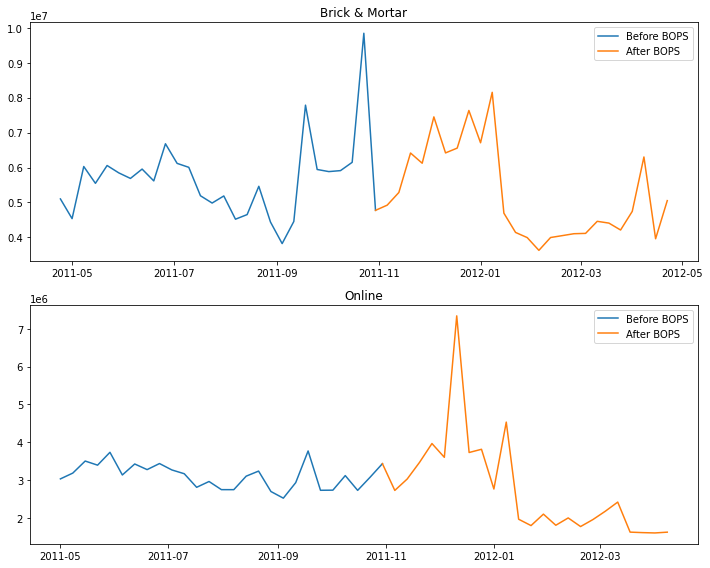

In [164]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))
axs[0].plot(
    pd.concat(
        [
            bops_bm_df[
                bops_bm_df['after'] == 0
            ]['sales'].resample('w').sum(),
            bops_bm_df[
                bops_bm_df['after'] == 1
            ]['sales'].resample('w').sum().head(1)
        ]
    ),
    label='Before BOPS'
)
        
axs[0].plot(
    bops_bm_df[
        bops_bm_df['after'] == 1
    ]
    ['sales'].resample('w').sum(),
    label='After BOPS'
)
axs[1].plot(
    pd.concat(
        [
            bops_ol_df[
                bops_ol_df['after'] == 0
            ]['sales'].resample('w').sum(),
            bops_ol_df[
                bops_ol_df['after'] == 1
            ]['sales'].resample('w').sum().head(1)
        ]
    ),
    label='Before BOPS'
)
        
axs[1].plot(
    bops_ol_df[
        bops_ol_df['after'] == 1
    ]
    ['sales'].resample('w').sum(),
    label='After BOPS'
)
axs[0].set_title('Brick & Mortar')
axs[1].set_title('Online')
axs[0].legend()
axs[1].legend()
fig.tight_layout()
plt.show()
plt.close()

We can see how, after a brief increase, wich can be explained by seasonality, there is a strong decay in sales in both channels.

Now, before jumping into conclusions and cancel the whole program, let's take a look and se how well did it behave for Canadian stores for stores close from DMA's.

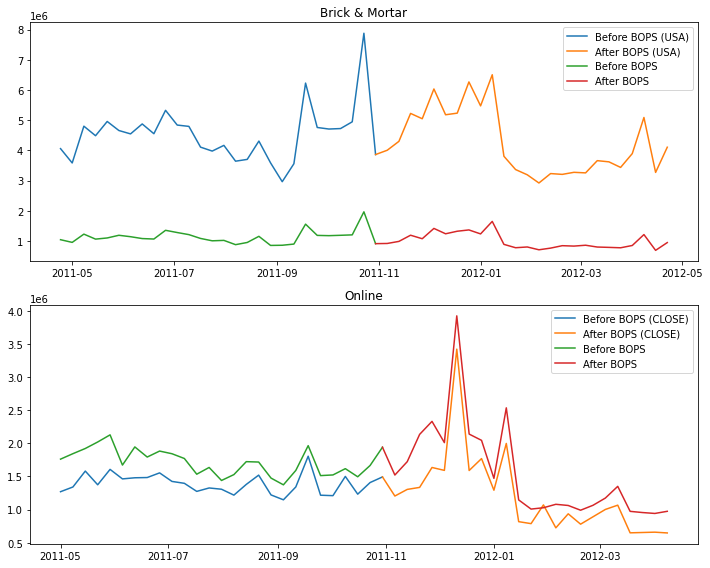

In [165]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))
            
axs[0].plot(
    pd.concat(
        [
            bops_bm_df[
                (bops_bm_df['after'] == 0) &
                (bops_bm_df['usa'] == 1)
            ]['sales'].resample('w').sum(),
            bops_bm_df[
                (bops_bm_df['after'] == 1) &
                (bops_bm_df['usa'] == 1)
            ]['sales'].resample('w').sum().head(1)
        ]
    ),
    label='Before BOPS (USA)'
)
        
axs[0].plot(
    bops_bm_df[
        (bops_bm_df['after'] == 1) &
        (bops_bm_df['usa'] == 1)
    ]
    ['sales'].resample('w').sum(),
    label='After BOPS (USA)'
)

axs[0].plot(
    pd.concat(
        [
            bops_bm_df[
                (bops_bm_df['after'] == 0) &
                (bops_bm_df['usa'] == 0)
            ]['sales'].resample('w').sum(),
            bops_bm_df[
                (bops_bm_df['after'] == 1) &
                (bops_bm_df['usa'] == 0)
            ]['sales'].resample('w').sum().head(1)
        ]
    ),
    label='Before BOPS'
)
        
axs[0].plot(
    bops_bm_df[
        (bops_bm_df['after'] == 1) &
        (bops_bm_df['usa'] == 0)
    ]
    ['sales'].resample('w').sum(),
    label='After BOPS'
)


axs[1].plot(
    pd.concat(
        [
            bops_ol_df[
                (bops_ol_df['after'] == 0) &
                (bops_ol_df['close'] == 1)
            ]['sales'].resample('w').sum(),
            bops_ol_df[
                (bops_ol_df['after'] == 1) &
                (bops_ol_df['close'] == 1)
            ]['sales'].resample('w').sum().head(1)
        ]
    ),
    label='Before BOPS (CLOSE)'
)

        
axs[1].plot(
    bops_ol_df[
        (bops_ol_df['after'] == 1) &
        (bops_ol_df['close'] == 1)
    ]
    ['sales'].resample('w').sum(),
    label='After BOPS (CLOSE)'
)
axs[1].plot(
    pd.concat(
        [
            bops_ol_df[
                (bops_ol_df['after'] == 0) &
                (bops_ol_df['close'] == 0)
            ]['sales'].resample('w').sum(),
            bops_ol_df[
                (bops_ol_df['after'] == 1) &
                (bops_ol_df['close'] == 0)
            ]['sales'].resample('w').sum().head(1)
        ]
    ),
    label='Before BOPS'
)

        
axs[1].plot(
    bops_ol_df[
        (bops_ol_df['after'] == 1) &
        (bops_ol_df['close'] == 0)
    ]
    ['sales'].resample('w').sum(),
    label='After BOPS'
)
axs[0].set_title('Brick & Mortar')
axs[1].set_title('Online')
axs[0].legend()
axs[1].legend()
fig.tight_layout()
plt.show()
plt.close()

In order to determine if it was a good decision, we can do some forecasting with `Prophet`.

In [166]:
from fbprophet import Prophet

In [167]:
ph_ol_df = pd.DataFrame(
    bops_ol_df[
        bops_ol_df['close'] == 0
    ]['sales'].resample('w').sum(),
).reset_index().rename(columns={'date':'ds', 'sales': 'y'})   

ph_ol_close_df = pd.DataFrame(
    bops_ol_df[
        bops_ol_df['close'] == 1
    ]['sales'].resample('w').sum(),
).reset_index().rename(columns={'date':'ds', 'sales': 'y'})

ph_bm_df = pd.DataFrame(
    bops_bm_df[
        bops_bm_df['usa'] == 0
    ]['sales'].resample('w').sum(),
).reset_index().rename(columns={'date':'ds', 'sales': 'y'})    

ph_bm_usa_df = pd.DataFrame(
    bops_bm_df[
        bops_bm_df['usa'] == 1
    ]['sales'].resample('w').sum(),
).reset_index().rename(columns={'date':'ds', 'sales': 'y'})

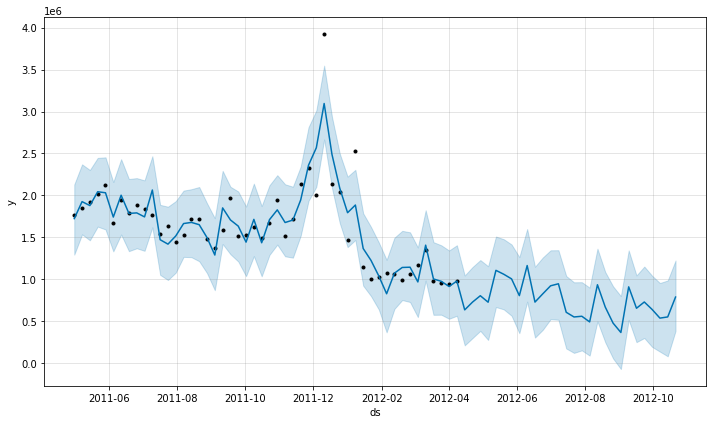

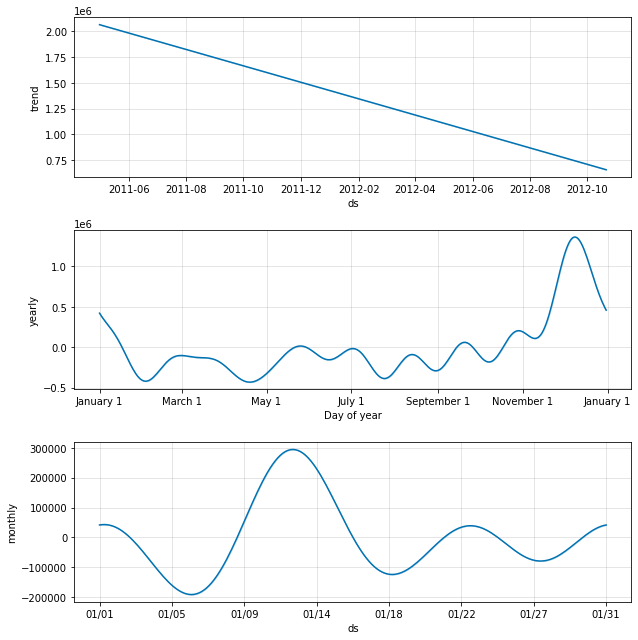

In [168]:
m = Prophet(
    interval_width=0.95,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=True,
    changepoint_prior_scale=2
)

m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

m.fit(ph_ol_df)

future = m.make_future_dataframe(
        periods=28,
        freq='W',
)

forecast_ol = m.predict(future)

m.plot(forecast_ol);
m.plot_components(forecast_ol);

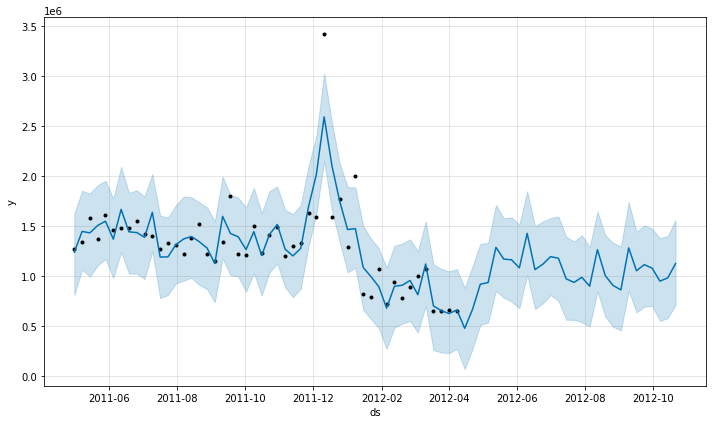

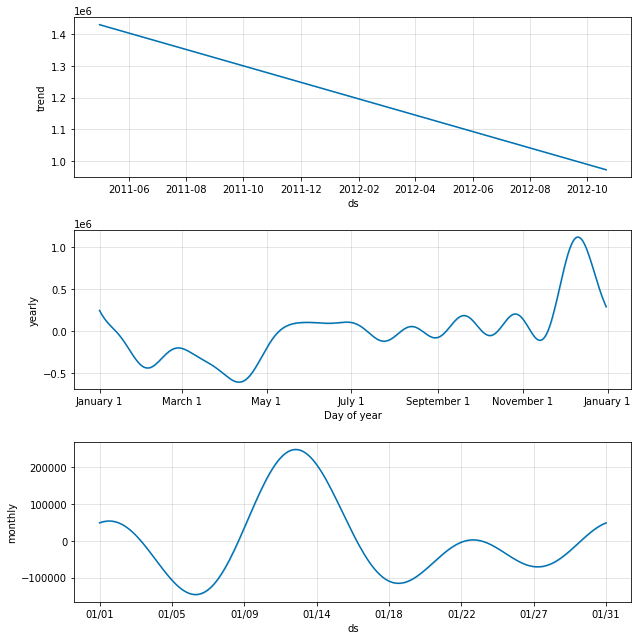

In [169]:
m = Prophet(
    interval_width=0.95,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=True,
    changepoint_prior_scale=2
)

m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

m.fit(ph_ol_close_df)

future = m.make_future_dataframe(
        periods=28,
        freq='W',
)

forecast_ol_close = m.predict(future)

m.plot(forecast_ol_close);
m.plot_components(forecast_ol_close);

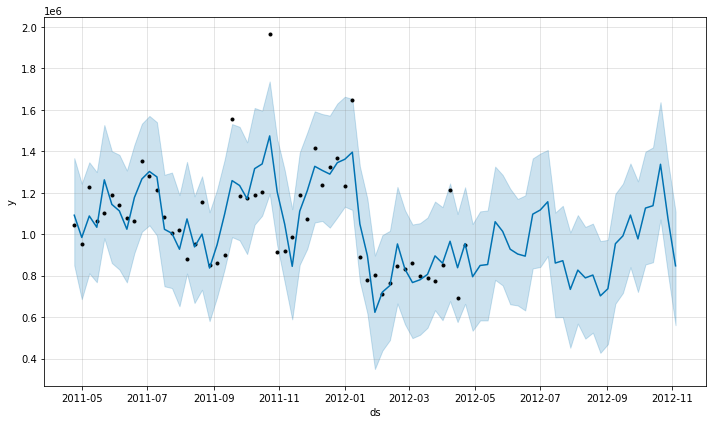

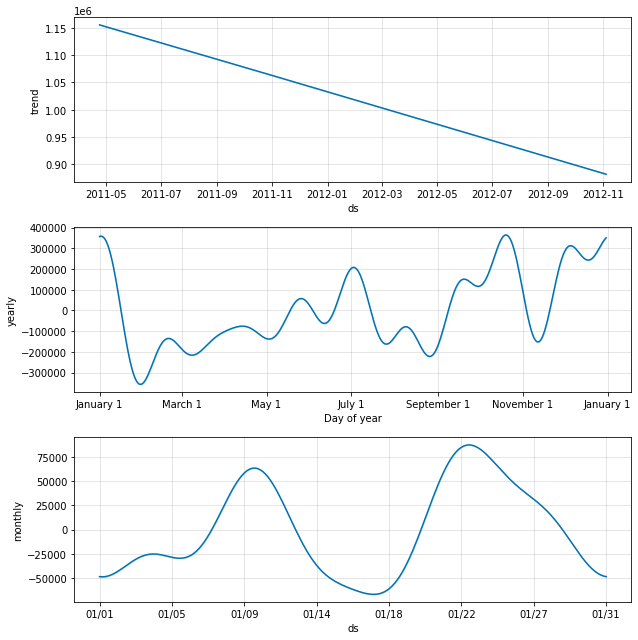

In [170]:
m = Prophet(
    interval_width=0.95,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=True,
    changepoint_prior_scale=2
)

m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

m.fit(ph_bm_df)

future = m.make_future_dataframe(
        periods=28,
        freq='W',
)

forecast_bm = m.predict(future)

m.plot(forecast_bm);
m.plot_components(forecast_bm);

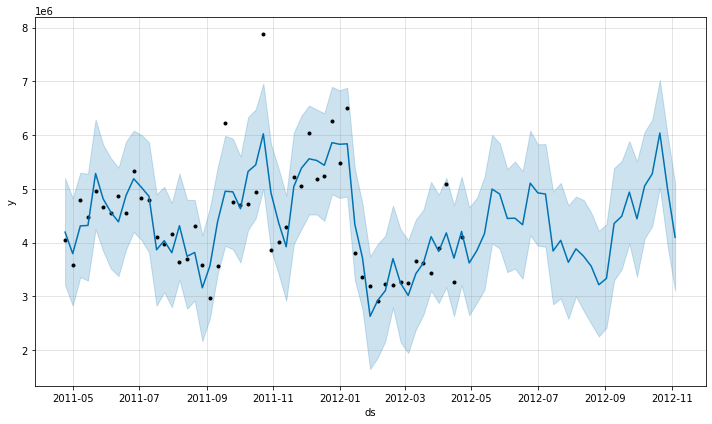

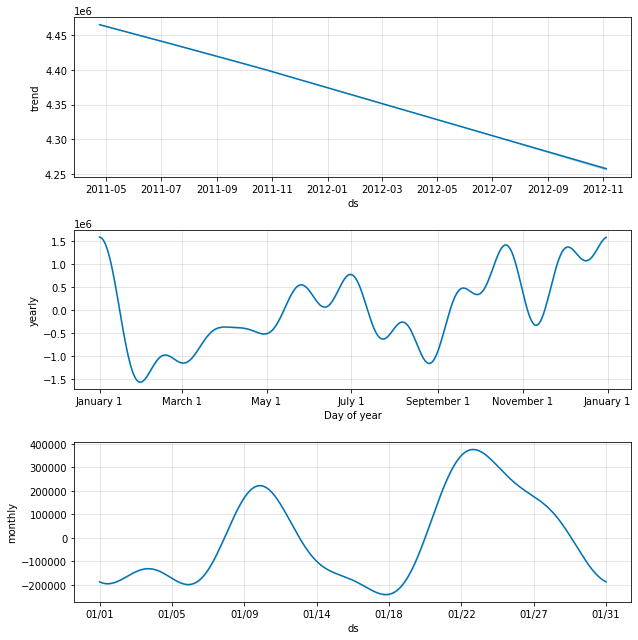

In [171]:
m = Prophet(
    interval_width=0.95,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=True,
    changepoint_prior_scale=2
)

m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

m.fit(ph_bm_usa_df)

future = m.make_future_dataframe(
        periods=28,
        freq='W',
)

forecast_bm_usa = m.predict(future)

m.plot(forecast_bm_usa);
m.plot_components(forecast_bm_usa);

We can now estimate the loss by using this predictions.

In [172]:
shifted_ph_ol = ph_ol_df.set_index('ds').shift(366, freq='d')
shifted_ph_ol_close = ph_ol_close_df.set_index('ds').shift(366, freq='d')
shifted_ph_bm = ph_bm_df.set_index('ds').shift(366, freq='d')
shifted_ph_bm_usa = ph_bm_usa_df.set_index('ds').shift(366, freq='d')

In [190]:
display('Online: {}'.format(
        shifted_ph_ol[
            shifted_ph_ol.index <= '2012-11-04'
        ]['y'].sum() - forecast_ol['yhat'].sum()
    )
)
display('Online close: {}'.format(
    shifted_ph_ol_close[
        shifted_ph_ol_close.index <= '2012-11-04'
    ]['y'].sum() - forecast_ol_close['yhat'].sum()
))
display('BM: {}'.format(
    shifted_ph_bm[
        shifted_ph_bm.index <= '2012-11-04'
    ]['y'].sum() - forecast_bm['yhat'].sum()
))
display('BM USA: {}'.format(
    shifted_ph_bm_usa[
        shifted_ph_bm_usa.index <= '2012-11-04'
    ]['y'].sum() - forecast_bm_usa['yhat'].sum()
))

'Online: -56502472.93566574'

'Online close: -56938407.30213913'

'BM: -51468509.189956784'

'BM USA: -229294095.0428164'

By all this, it's not adviced to extend the program.